# Lineare Regression mit Python

**Dieses Notebook dient hauptsächlich als Code-Referenz. Bitte schaut das Video für mehr Informationen zum Thema der Regression.**

Deine Nachbarin ist eine Immobilienmarklerin und möchte etwas Hilfe dabei haben, die Hauspreise für Regionen in den USA vorherzusagen. Es wäre toll wenn du irgendwie ein Modell für sie erstellen könntest, dass einige Eigenschaften berücksichtigt und eine Schätzung für den Verkaufspreis abgibt.

Sie hat dich deshalb darum gebeten ihr mit deinen neuen Data Science Skills zu helfen. Du sagst ja und entscheidest dich für eine Lineare Regression als Lösungsansatz für deine Aufgabe.

Deine Nachbarin stellt dir dann die Daten zur Verfügung, die sie über einige Häuser in verschiedenen Regionen der USA hat. Das alles findest du im Datensatz: USA_Housing.csv

Die Daten beinhalten folgende Spalten:

* 'Avg. Area Income': Durchschnittliches Einkommen von Einwohnern der Stadt in der sich das Haus befindet.
* 'Avg. Area House Age': Durchschnittliches Alter von Häusern in der Gegend des Hauses
* 'Avg. Area Number of Rooms': Durchschnittliches Anzahl an Zimmern in Häusern in der Gegend des Hauses
* 'Avg. Area Number of Bedrooms': Durchschnittliches Anzahl an Schlafzimmern in Häusern in der Gegend des Hauses
* 'Area Population': Bevölkerung der Stadt in der sich das Haus befindet
* 'Price': Preis zu dem das Haus verkauft wurde
* 'Address': Addresse des Hauses

**Legen wir los!**

## Daten anschauen

Wir haben jetzt den Datensatz unserer Nachbarin erhalten und sollten unsere Python Umgebung mit allen Libraries vorbereiten, die wir brauchen. Anschließend können wir die Daten aus der CSV-Datei importieren!

### Libraries importieren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Daten anschauen

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Verteilung der Daten

Erstellen wir als nächstes noch einige Diagramme zur Veranschaulichung unserer Daten!

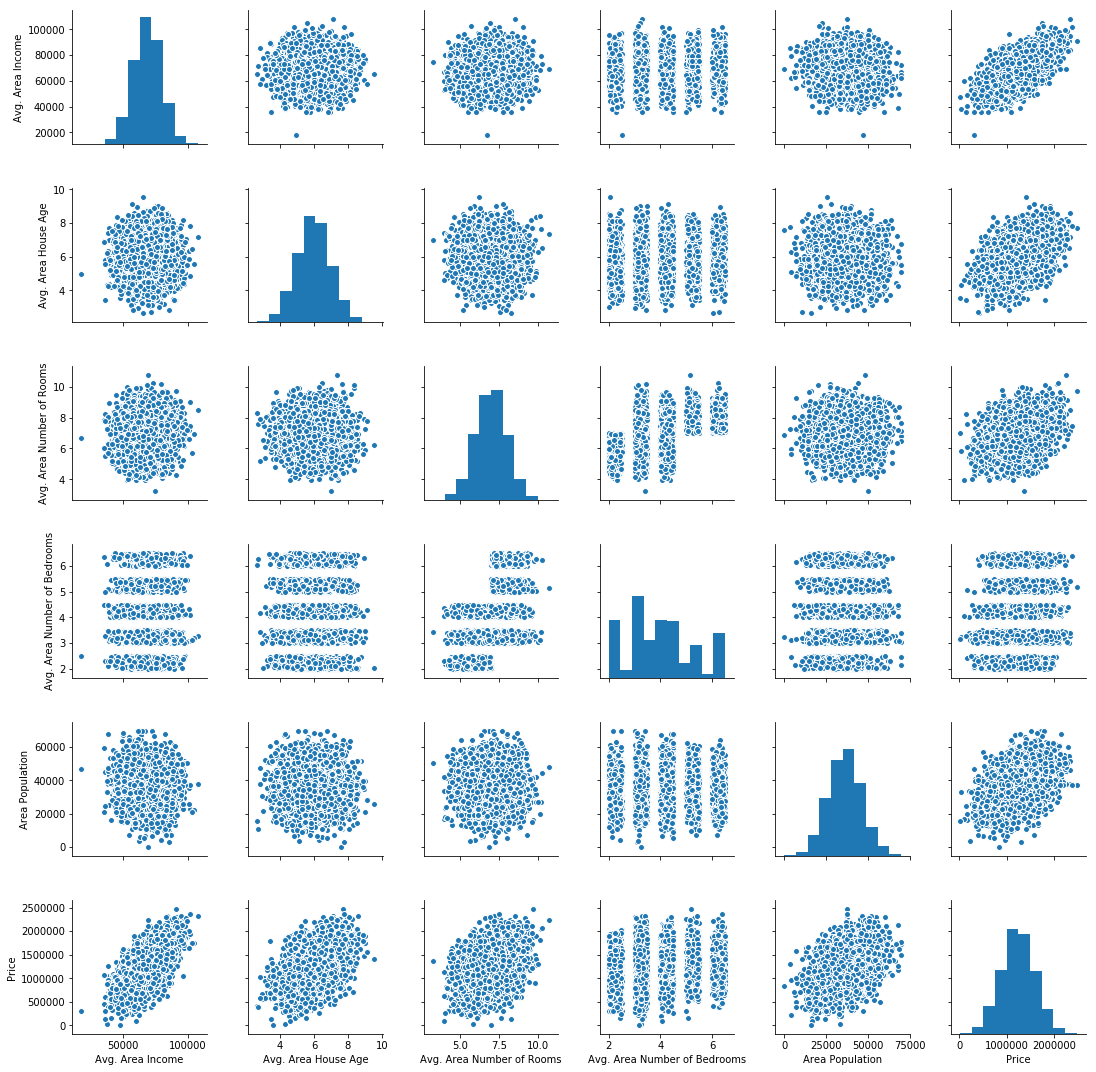

In [7]:
sns.pairplot(USAhousing)

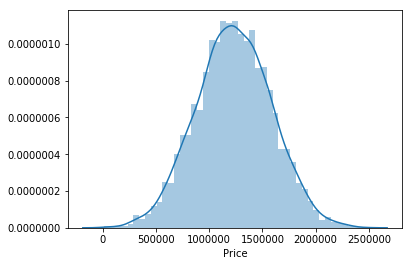

In [8]:
sns.distplot(USAhousing['Price'])

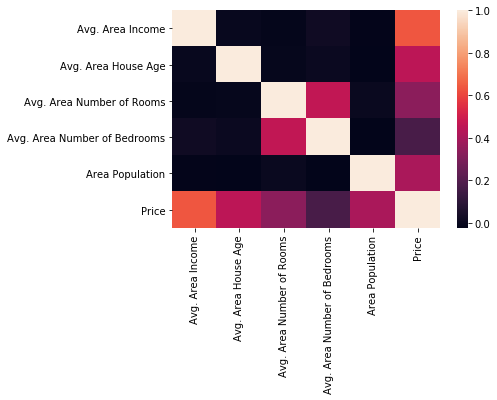

In [9]:
sns.heatmap(USAhousing.corr())

# Ein lineares Regressionsmodell trainieren

Wir können nun damit beginnen unser lineares Regressionsmodell zu trainieren. Dazu müssen wir unsere Daten zuerst in ein x-Array (mit den Features) und ein y-Array (mit der Zielvariablen) aufteilen. In diesem Fall wollen wir den Preis (en. price) vorhersagen, also ist diese Spalte unsere Zielvariable. Wir lassen außerdem die Adress-Spalte außen vor, da sie nur Textinformation enthält, die dem Modell nichts nützt.

### x und y Arrays

In [10]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Trainings- und Testprobe

Als nächstes sollten wir die Daten in einen Teil zum Trainieren und einen Teil zum Testen des Modells aufteilen. Nachdem wir unser Modell mit der Trainingsprobe trainiert haben können wir die Qualität mit der Testprobe überprüfen.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Erstellung und Training des Modells

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Modellbewertung

Überprüfen wir nun die Koeffizienten unseres Modells und sprechen darüber, wie diese Interpretiert werden können:

In [16]:
# Achsenabschnitt ausgeben
print(lm.intercept_)

-2640159.79685


In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpretation der Koeffizienten:

* Hält man alle anderen Features konstant dann wird ein Anstieg des **Avg. Area Income** um 1 Einheit mit einem Anstieg von 21.52\$ asoziiert
* Hält man alle anderen Features konstant dann wird ein Anstieg des **Avg. Area House Age** um 1 Einheit mit einem Anstieg von 164883.28\$ asoziiert
* Hält man alle anderen Features konstant dann wird ein Anstieg des **Avg. Area Number of Rooms** um 1 Einheit mit einem Anstieg von 122368.67\$ asoziiert
* Hält man alle anderen Features konstant dann wird ein Anstieg des **Avg. Area Number of Bedrooms** um 1 Einheit mit einem Anstieg von 2233.80\$ asoziiert
* Hält man alle anderen Features konstant dann wird ein Anstieg des **Area Population** um 1 Einheit mit einem Anstieg von 15.15\$ asoziiert

Ergibt das Sinn? Wahrscheinlich nicht sehr viel, da dies ausgedachte Daten sind. Für echte Daten bietet sich der [Boston Datensatz](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) an:

    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Vorhersage des Modells

Lassen wir nun einige Vorhersagen aus unserer Testprobe treffen und Überprüfen wie gut unser Modell ist.

In [18]:
predictions = lm.predict(X_test)

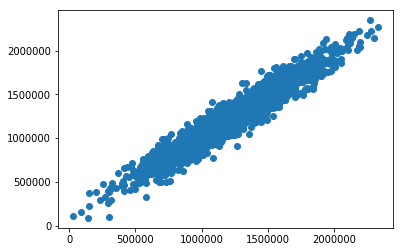

In [19]:
plt.scatter(y_test,predictions)

## Residuen

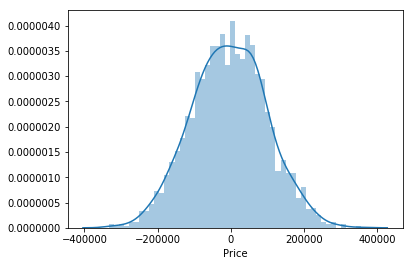

In [20]:
sns.distplot((y_test-predictions),bins=50);

## Regressions Auswertungsmetriken

Hier sind drei der üblichen Metriken zur Auswertung von Regressions Aufgaben:

**Mean Absolute Error** (MAE) ist der Durchschnitt des absoluten Werts der Errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) ist der Durchschnitt der quadrierten Errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RSME) ist die Quadratwurzel des Durchschnitts der quardrierten Errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Diese Matriken vergleichen:

* **MAE** ist am leichtesten zu verstehen, da sie den durchschnittlichen Error angibt
* **MSE** ist verbreiteter, da MSE die größeren Errors "bestraft", was in der realen Welt nützlich ist
* **RSME** ist sogar noch verbreiteter als MSE, da RMSE in "y" Einheiten interpretierbar ist

Alle drei sind sogenannte *loss functions*, da wir sie minimieren wollen!

In [21]:
from sklearn import metrics

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.2225191
MSE: 10460958907.2
RMSE: 102278.829223


Das war deine erstes echtes Machine Learning Projekt! Glückwunsch zur Hilfe, die du deiner Nachbarin leisten konntest! Wir werden es vorerst dabei belassen. Probiere aber gerne selbstständige den Boston Datensatz aus, den wir vorhin erwähnt haben. 

Als nächstes wagen wir uns an dein erstes eigenen Machine Learning Projekt!

# Gut gemacht!